In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification # 예제 데이터셋 생성 모듈

# from tensorflow.keras.models import Sequential # 순차적 모델을 생성하기 위한 모듈
# from tensorflow.keras.layers import Dense # 밀집층(fully connected layer)을 추가하기 위한 모듈
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# 1. 데이터 준비, 여기서는 예제 데이터 생성 (숫자는 정규화, 범주형은 인코딩 후 원핫 인코딩)
x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

In [3]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [7]:
# 2. 모델 설계
# 입력층, 은닉층, 출력층 이진 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
# 3. 모델 컴파일
# 손실 함수: Binary Cross-Entropy
# 최적화 알고리즘: Adam
# 평가지표: Accuracy
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [9]:
# 4. Early Stopping 적용
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [11]:
# 5. 모델 훈련
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4980 - loss: 0.8211 - val_accuracy: 0.5800 - val_loss: 0.6526
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6287 - loss: 0.6406 - val_accuracy: 0.7133 - val_loss: 0.5833
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6961 - loss: 0.5942 - val_accuracy: 0.7933 - val_loss: 0.5205
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7710 - loss: 0.5184 - val_accuracy: 0.8333 - val_loss: 0.4590
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7837 - loss: 0.4866 - val_accuracy: 0.8533 - val_loss: 0.4039
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8012 - loss: 0.4422 - val_accuracy: 0.8733 - val_loss: 0.3516
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8365 - loss: 0.4121 - val_accuracy: 0.8733 - val_loss: 0.3186
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8826 - loss: 0.3549 - val_accuracy: 0.8933 - val_loss:

In [12]:
# 6. 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss : {test_loss: .4f}, Test Accuracy: {test_accuracy: .4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9060 - loss: 0.2249 
Test Loss :  0.1937, Test Accuracy:  0.9133


In [13]:
# 7. 예측
predictions = model.predict(x_test)
predicted_classes = (predictions>0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [14]:
# 8. 보고서 출력력
print("\nClassification Report: ")
print(classification_report(y_test, predicted_classes))


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.88      0.94      0.91        71

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



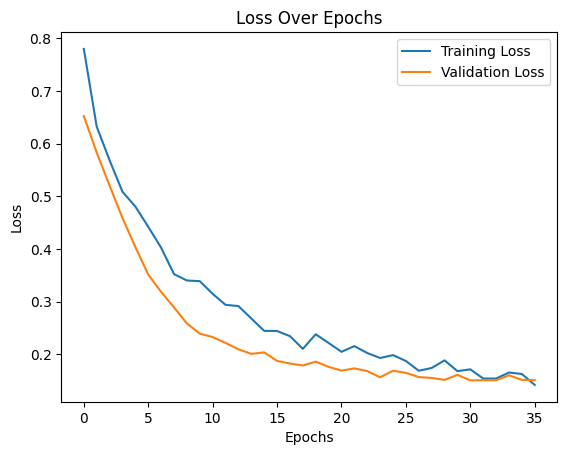

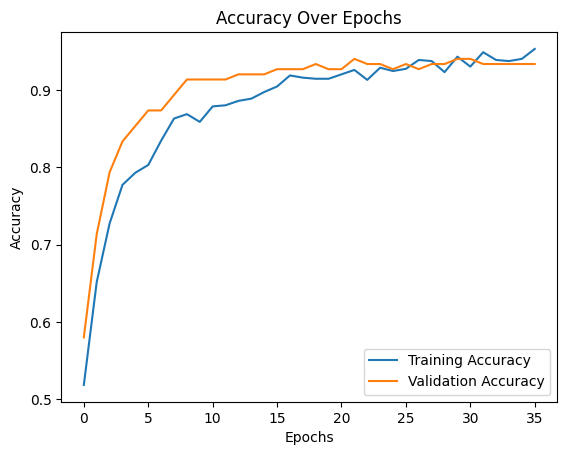

In [15]:
# 9. 학습결과 시각화
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()